In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#Changes expected in Github repository
#Dataset
#https://www.kaggle.com/datasets/abhishekrp1517/online-retail-transactions-dataset/data


Checking Data

In [3]:
data = pd.read_csv('Onlineretail.csv',)
# data2 = pd.read_csv('test.csv')

# data = pd.concat([data], axis=0)
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


Shape of the data


In [4]:
# shape of dataframe
print(f"Total No of Rows are ={data.shape[0]} and Columns = {data.shape[1]}")

Total No of Rows are =541909 and Columns = 8


Basic Info

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   541909 non-null  int64  
 7   Country      541909 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 33.1+ MB


Checking Null Values

In [6]:
data.isnull().sum()

InvoiceNo         0
StockCode         0
Description    1454
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID        0
Country           0
dtype: int64

Dropping missing values

In [7]:
data.dropna(subset=['Description'], inplace=True)


In [8]:
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

Describing the data

In [9]:
data.describe(include='all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,540455,540455,540455,540455.000000,540455,540455.000000,540455.000000,540455
unique,24446,3958,4223,NaN,22309,NaN,NaN,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,2011-10-31 14:41:00,NaN,NaN,United Kingdom
freq,1114,2313,2369,NaN,1114,NaN,NaN,494024
mean,NaN,NaN,NaN,9.603129,NaN,4.623519,15287.519829,NaN
std,NaN,NaN,NaN,218.007598,NaN,96.889628,1486.741928,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,14364.000000,NaN
50%,NaN,NaN,NaN,3.000000,NaN,2.080000,15287.000000,NaN
75%,NaN,NaN,NaN,10.000000,NaN,4.130000,16261.000000,NaN


In [10]:
data.nunique()

InvoiceNo      24446
StockCode       3958
Description     4223
Quantity         671
InvoiceDate    22309
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 540455 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    540455 non-null  object 
 1   StockCode    540455 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     540455 non-null  int64  
 4   InvoiceDate  540455 non-null  object 
 5   UnitPrice    540455 non-null  float64
 6   CustomerID   540455 non-null  int64  
 7   Country      540455 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 37.1+ MB


Checking Outliers

In [12]:
from scipy import stats

# Calculate z-scores for Quantity and UnitPrice columns
z_scores_quantity = stats.zscore(data['Quantity'])
z_scores_unitprice = stats.zscore(data['UnitPrice'])

# Find outliers based on z-score threshold of 3
outliers_quantity = data[abs(z_scores_quantity) > 3]
outliers_unitprice = data[abs(z_scores_unitprice) > 3]

# Print the outliers
print("Outliers in Quantity column:")
print(outliers_quantity)

print("Outliers in UnitPrice column:")
print(outliers_unitprice)


Outliers in Quantity column:
       InvoiceNo StockCode                          Description  Quantity  \
4287     C536757     84347  ROTATING SILVER ANGELS T-LIGHT HLDR     -9360   
4850      536809     84950       ASSORTED COLOUR T-LIGHT HOLDER      1824   
4945      536830     84077    WORLD WAR 2 GLIDERS ASSTD DESIGNS      2880   
4946      536830     21915               RED  HARMONICA IN BOX       1400   
6365      536890    17084R                ASSORTED INCENSE PACK      1440   
...          ...       ...                                  ...       ...   
540061    581457     23543                  WALL ART KEEP CALM        698   
540070    581458     22197                       POPCORN HOLDER      1500   
540071    581459     22197                       POPCORN HOLDER      1200   
540421    581483     23843          PAPER CRAFT , LITTLE BIRDIE     80995   
540422   C581484     23843          PAPER CRAFT , LITTLE BIRDIE    -80995   

                InvoiceDate  UnitPrice  Custom

Checking Negative value in Unit price and Quantity

In [13]:
data[data["UnitPrice"] <0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,15287,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,15287,United Kingdom


In [14]:
data = data[data["Quantity"] < 0]

In [15]:
# converting negative values into postive values
data['UnitPrice'] = data['UnitPrice'].abs()
data['Quantity'] = data['Quantity'].abs()
data[data["UnitPrice"] <0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [16]:
data = data[data['UnitPrice'] > 0]
data = data[data['Quantity'] > 0]

In [17]:
data[data['Quantity'] == 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [18]:
data[data['UnitPrice'] == 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


Using box plot to delete outliers

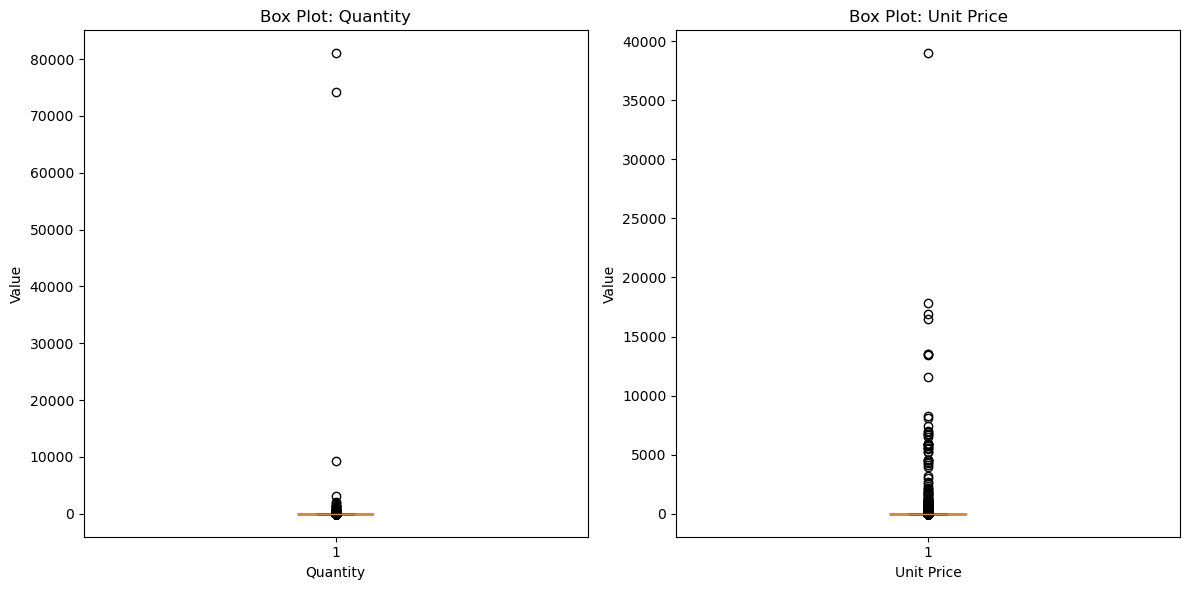

In [19]:
# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Create box plots for quantity and unit price
axs[0].boxplot(data['Quantity'])
axs[0].set_xlabel('Quantity')
axs[0].set_ylabel('Value')
axs[0].set_title('Box Plot: Quantity')

axs[1].boxplot(data['UnitPrice'])
axs[1].set_xlabel('Unit Price')
axs[1].set_ylabel('Value')
axs[1].set_title('Box Plot: Unit Price')

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


In [20]:
# Calculate z-scores for Quantity and UnitPrice columns
z_scores_quantity = stats.zscore(data['Quantity'])
z_scores_unitprice = stats.zscore(data['UnitPrice'])

# Find outliers based on z-score threshold of 3
outliers_quantity = data[abs(z_scores_quantity) > 3]
outliers_unitprice = data[abs(z_scores_unitprice) > 3]

# Remove outliers from the data
data = data[~data.index.isin(outliers_quantity.index)]
data = data[~data.index.isin(outliers_unitprice.index)]


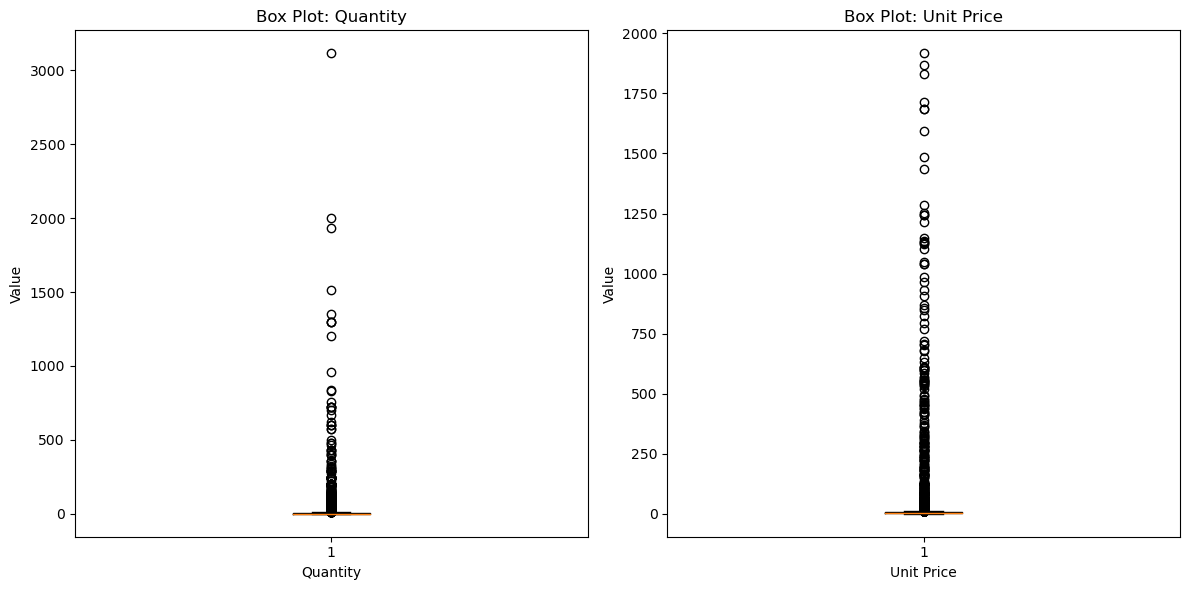

In [21]:
# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
# Create box plots for quantity and unit price
axs[0].boxplot(data['Quantity'])
axs[0].set_xlabel('Quantity')
axs[0].set_ylabel('Value')
axs[0].set_title('Box Plot: Quantity')

axs[1].boxplot(data['UnitPrice'])
axs[1].set_xlabel('Unit Price')
axs[1].set_ylabel('Value')
axs[1].set_title('Box Plot: Unit Price')

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


In [22]:
data.shape

(9242, 8)

Creating a Sales column to see the sales pattern

In [23]:
data['Year'] = pd.to_datetime(data["InvoiceDate"]).dt.year
data["Month"] = pd.to_datetime(data["InvoiceDate"]).dt.month
data['Month_Name_year_wise'] = pd.to_datetime(data["InvoiceDate"]).dt.month_name()
# data['Week'] = pd.to_datetime(data["InvoiceDate"]).dt.week
data['day'] = pd.to_datetime(data["InvoiceDate"]).dt.day
data['Weekday'] = pd.to_datetime(data["InvoiceDate"]).dt.weekday
data["Day_Name"] = pd.to_datetime(data["InvoiceDate"]).dt.day_name()

# Create new column with time interval labels
data['Time'] = pd.to_datetime(data['InvoiceDate']).dt.hour
data['Time of Day'] = ['Early Morning' if x < 6 
                     else ('Morning' if x < 12 
                           else ('Noon' if x < 14 
                                 else ('Afternoon' if x < 18 
                                       else ('Evening' if x < 22 else 'Night')))) for x in data['Time']]


In [24]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Month_Name_year_wise,day,Weekday,Day_Name,Time,Time of Day
141,C536379,D,Discount,1,2010-12-01 09:41:00,27.50,14527,United Kingdom,2010,12,December,1,2,Wednesday,9,Morning
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,1,2010-12-01 09:49:00,4.65,15311,United Kingdom,2010,12,December,1,2,Wednesday,9,Morning
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,12,2010-12-01 10:24:00,1.65,17548,United Kingdom,2010,12,December,1,2,Wednesday,10,Morning
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,24,2010-12-01 10:24:00,0.29,17548,United Kingdom,2010,12,December,1,2,Wednesday,10,Morning
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,24,2010-12-01 10:24:00,0.29,17548,United Kingdom,2010,12,December,1,2,Wednesday,10,Morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,11,2011-12-09 09:57:00,0.83,14397,United Kingdom,2011,12,December,9,4,Friday,9,Morning
541541,C581499,M,Manual,1,2011-12-09 10:28:00,224.69,15498,United Kingdom,2011,12,December,9,4,Friday,10,Morning
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,5,2011-12-09 11:57:00,10.95,15311,United Kingdom,2011,12,December,9,4,Friday,11,Morning
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,1,2011-12-09 11:58:00,1.25,17315,United Kingdom,2011,12,December,9,4,Friday,11,Morning


Top 10 Customer who has ordered most number of items

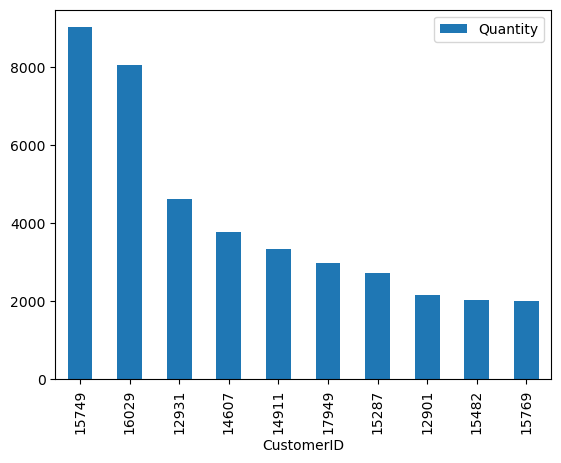

In [25]:
customer_totals = data.groupby('CustomerID')['Quantity'].sum()

# sort the customer_totals by Quantity in descending order
sorted_totals = customer_totals.sort_values(ascending=False)
sorted_totals.head(10).plot(kind="bar")
plt.legend()
plt.show()

Why Create a sales Column?
Sales column is created to check the amount of the sales based on quantiy and unit price

In [26]:
# created a sales columns
data['Sales'] = data['UnitPrice'] * data['Quantity']
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,9242.0,12.222463,68.594102,1.00,1.00,2.00,6.00,3114.0
UnitPrice,9242.0,14.062604,87.032575,0.01,1.45,2.95,5.75,1917.0
CustomerID,9242.0,15003.265960,1674.560044,12352.00,13590.00,14911.00,16300.75,18282.0
Year,9242.0,2010.921878,0.268377,2010.00,2011.00,2011.00,2011.00,2011.0
Month,9242.0,7.280242,3.517363,1.00,4.00,8.00,10.00,12.0
day,9242.0,14.907379,8.609610,1.00,7.00,14.00,22.00,31.0
Weekday,9242.0,2.215538,1.576758,0.00,1.00,2.00,3.00,6.0
Time,9242.0,13.153755,2.703277,6.00,11.00,13.00,15.00,20.0
Sales,9242.0,35.404333,165.203957,0.12,3.58,8.50,17.40,6539.4


Sales Based on Time of day

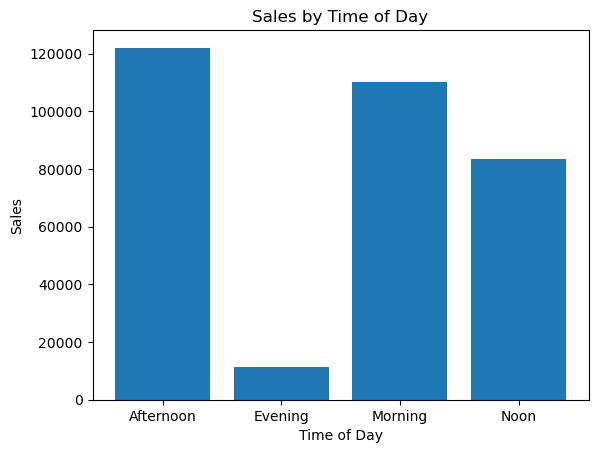

In [27]:
sales_by_time = data.groupby('Time of Day')['Sales'].sum()

# Plot the data
plt.bar(sales_by_time.index, sales_by_time)
plt.xlabel('Time of Day')
plt.ylabel('Sales')
plt.title('Sales by Time of Day')
plt.show()


Pie Chart to show Sales and Quantity sold by months

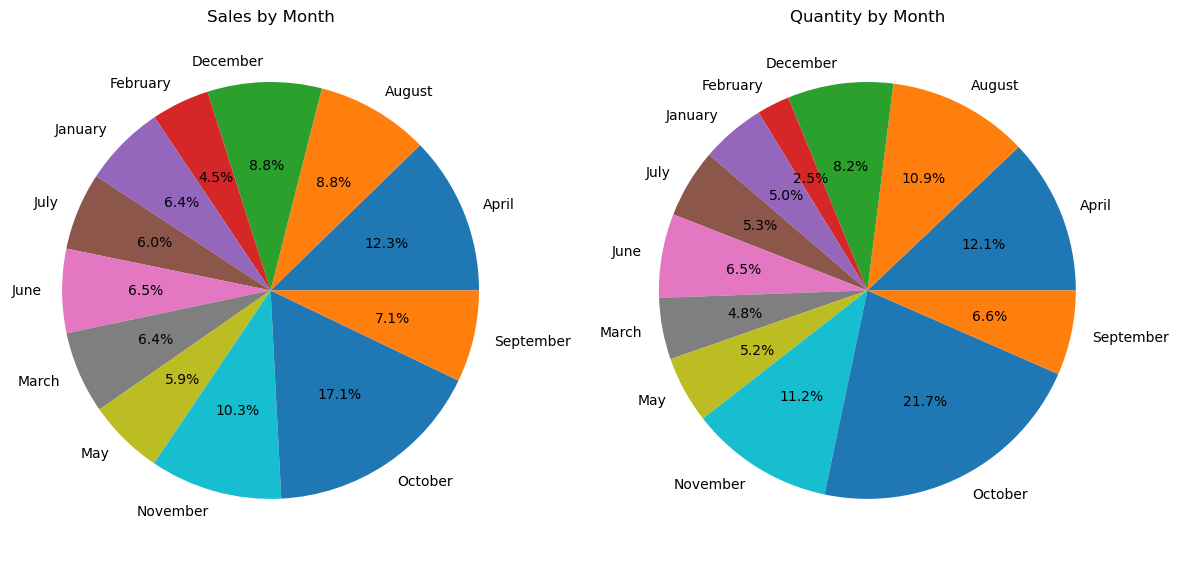

In [28]:
sales_by_month = data.groupby('Month_Name_year_wise')['Sales'].sum()
quantity_by_month = data.groupby('Month_Name_year_wise')['Quantity'].sum()
# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot the pie chart for sales by month
axs[0].pie(sales_by_month, labels=sales_by_month.index, autopct='%1.1f%%')
axs[0].set_title('Sales by Month')

# Plot the pie chart for quantity by month
axs[1].pie(quantity_by_month, labels=quantity_by_month.index, autopct='%1.1f%%')
axs[1].set_title('Quantity by Month')

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


Top 10 Countries based on Quantity Sold

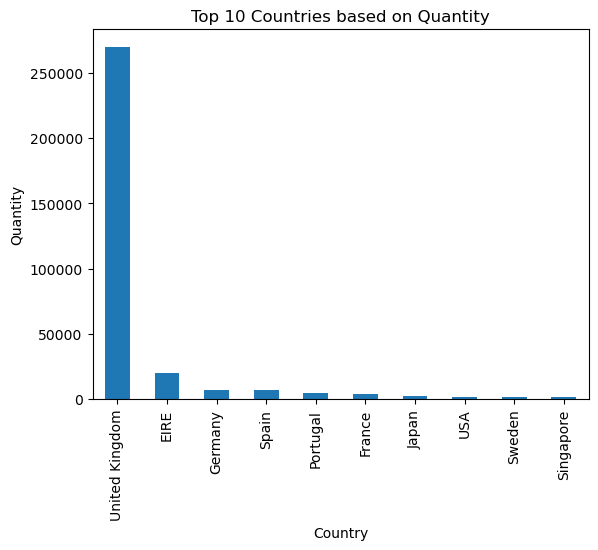

In [32]:
sales_by_country = data.groupby('Country')['Sales'].sum().nlargest(10)


top_10_countries = sales_by_country.nlargest(10)
top_10_countries.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Quantity')
plt.title('Top 10 Countries based on Quantity')
plt.show()


In [ ]:
data.describe(include='object').T

,count,unique,top,freq
InvoiceNo,9242,3792,C570867,101
StockCode,9242,1946,M,232
Description,9242,1971,Manual,232
InvoiceDate,9242,3723,2011-10-12 16:17:00,101
Country,9242,30,United Kingdom,7817
Month_Name_year_wise,9242,12,October,1194
Day_Name,9242,6,Thursday,2351
Time of Day,9242,4,Afternoon,3528


Encoding the Country column using label encoder

In [ ]:
# Create an instance of LabelEncoder
encoder = LabelEncoder()

# Encode the 'Country' column
data['Country_encoded'] = encoder.fit_transform(data['Country'])



Checking correlation between the columns we have

<Axes: >

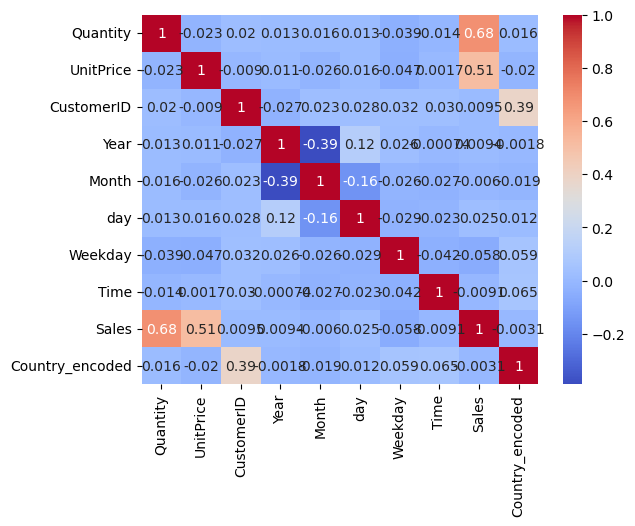

In [ ]:

# Select the numerical columns
numerical_cols = data.select_dtypes(include=[np.number])

# Generate the heatmap
sns.heatmap(numerical_cols.corr(), annot=True, cmap='coolwarm')


Using standard scalar method to scale the columns we have

In [ ]:
# The StandardScaler is used to standardize the numerical features in the dataset. 
#It scales the features to have zero mean and unit variance, which helps in improving 
#the performance of certain machine learning algorithms that are sensitive to the scale of the features.


# Select the numerical columns
numerical_cols = data.select_dtypes(include=[np.number])

# Create an instance of StandardScaler
scaler = StandardScaler()

# Apply standard scaling to the numerical columns
data[numerical_cols.columns] = scaler.fit_transform(numerical_cols)


In [ ]:
cat_features = [feature for feature in data.columns if data[feature].dtype == 'O']
print('Num of Categorical Features :', len(cat_features))

Num of Categorical Features : 8


In [ ]:
num_features = [feature for feature in data.columns if data[feature].dtype != 'O']
print('Num of Numerical Features :', len(num_features))

Num of Numerical Features : 10


In [ ]:
# Split the data into train and test sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Print the shapes of the train and test sets
print("Train data shape:", train_data.shape)
print("Test data shape:", test_data.shape)


Train data shape: (7393, 18)
Test data shape: (1849, 18)


In [ ]:
# Fit the model to the data
# Create the regression model
model = LinearRegression()

# Split the data into features (X) and target variable (y)
X = data[['Quantity', 'UnitPrice', 'Country_encoded']]
y = data['Sales']

# Fit the model to the data
model.fit(X, y)

# Predict the target variable
y_pred = model.predict(X)

# Calculate the mean squared error
mse = mean_squared_error(y, y_pred)
mse


0.2578187986703184